# Quality Score in High-throughput Sequencing

In this notebook, I have arranged the information on websites and created the notes about quality score used in High-throughput sequencing.

In [1]:
### import libraries
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
### set directories/constants
DIR_DAT_RAW  = "/home/jovyan/work/Data/SRR4841864/rawdata"
DIR_DAT_TRIM = "/home/jovyan/work/Data/SRR4841864/trimmed_fastqs/"
DIR_CUR      = "/home/jovyan/work/GitRepo/Duke_CBB520_HW2"

## How is the quality score store in fastq

The quality score is stored in the fourth line of each read

In [3]:
with open(os.path.join(DIR_DAT_RAW, "SRR4841864_1.fastq"), 'r') as fp:
    for cnt, line in enumerate(fp):
        line = line.strip()
        if cnt % 4 == 0:
            print("\n====================================================")
        print("Line {0:^3}: {1}".format(cnt, line))
        if cnt > 10:
            break


Line  0 : @SRR4841864.1 1 length=101
Line  1 : NGGCATACCAATGGGAAGAGCATGCGTGGGAATGGTATTCAAAAATCGAGAAAGAAGGATGCTGCTGCTGCTGCCGCTGTTGGGAAAGCTATAAAGGATGA
Line  2 : +SRR4841864.1 1 length=101
Line  3 : #1:BDFFFDHFHDGGBBGGHGIGGHEHGIFIHGFDB?FHGHIIIDDGFHGCHIIIIIIIIIHGCCCBBDFDFCCECCCCBCCCBBABBCCCCCCECCCCCC

Line  4 : @SRR4841864.2 2 length=101
Line  5 : NAGCTTCGTTAAGACTTTGACTGGTAAGACCATCACTTTGGAAGTTGAATCTTCTGACACCATTGACAATGTCAAGTCCAAGATCCAAGACAAGGAAGGTA
Line  6 : +SRR4841864.2 2 length=101
Line  7 : #1=BDDDD?CFFFIIEFIFFHFIEFHIBHFFEFEFFIFEFIIFE<<?D?DGFIFIIGFEDFFIEGFFGGCC7@EFE7=AEEEDDDDDC@CCCBBBBBBBA>

Line  8 : @SRR4841864.3 3 length=101
Line  9 : NTTATATCTATGAATGAATATGCATTGCTCTTCTGATACTATGGTATGAGAGGCCTTGGTAAAGGGCATCGATAACCGAAAGAATCATCCGCAGAGAAGTA
Line 10 : +SRR4841864.3 3 length=101
Line 11 : #1=?DDD?F?D8<FEGBABHBA<FHE93AAAHD<AFEG4?:ED<?DD<B4B918B@?FH8BDG?)BDFDHID@6;3=:59=<ACCCA@>CBB8?B253<:3


## Introduction to Quality Score in Sequencing

The ASCII number of each character is called the phred score, which can be converted to the probability of error.

The relationship of phred score Q and error probability P for each base is:
$$Q = -10 \log_{10} P$$
$$P = 10^{-\frac{Q}{10}}$$

There are two ways of setting the phred score and the Ascii code: phred+33 or phred+44  

In [4]:
def error_prob(quality):
    qval = quality
    return 10**(qval/-10.0)

print ("{0:^5}  {1:^8}  {2:^8}  {3:^8}".format("Phred",  "Prob of", "Phred+33", "Phred+64"))
print ("{0:^5}  {1:^8}  {2:^8}  {3:^8}".format("score",  "Error", "Ascii", "Ascii"))
for phred in range(0,42):
    print ("{0:^5}  {1:03.5f}  {2:^8}  {3:^8}".format(phred, error_prob(phred), chr(phred+33), chr(phred+64)))

Phred  Prob of   Phred+33  Phred+64
score   Error     Ascii     Ascii  
  0    1.00000     !         @    
  1    0.79433     "         A    
  2    0.63096     #         B    
  3    0.50119     $         C    
  4    0.39811     %         D    
  5    0.31623     &         E    
  6    0.25119     '         F    
  7    0.19953     (         G    
  8    0.15849     )         H    
  9    0.12589     *         I    
 10    0.10000     +         J    
 11    0.07943     ,         K    
 12    0.06310     -         L    
 13    0.05012     .         M    
 14    0.03981     /         N    
 15    0.03162     0         O    
 16    0.02512     1         P    
 17    0.01995     2         Q    
 18    0.01585     3         R    
 19    0.01259     4         S    
 20    0.01000     5         T    
 21    0.00794     6         U    
 22    0.00631     7         V    
 23    0.00501     8         W    
 24    0.00398     9         X    
 25    0.00316     :         Y    
 26    0.00251    

## Visualization of Phred Score

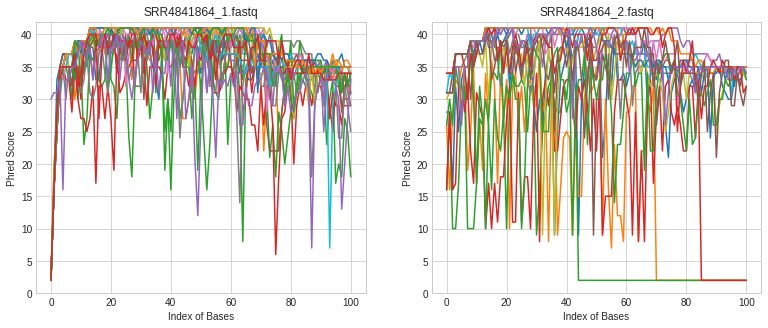

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13,5))

### read 1
ax = axes[0]
with open(os.path.join(DIR_DAT_RAW, "SRR4841864_1.fastq"), 'r') as fp:
    for cnt, line in enumerate(fp):
        if cnt > 100:
            break   
        if cnt % 4 == 3:
            line = line.strip()
            phred = [ord(char)-33      for char  in line ]
            prob  = [error_prob(score) for score in phred]
            ax.plot(phred)

### read 2
ax = axes[1]
with open(os.path.join(DIR_DAT_RAW, "SRR4841864_2.fastq"), 'r') as fp:
    for cnt, line in enumerate(fp):
        if cnt > 64:
            break   
        if cnt % 4 == 3:
            line = line.strip()
            phred = [ord(char)-33      for char  in line ]
            prob  = [error_prob(score) for score in phred]
            ax.plot(phred)

### Set plot axes
ax1, ax2 = axes
ax1.set_title("SRR4841864_1.fastq")
ax2.set_title("SRR4841864_2.fastq")

ax1.set_ylim([0, 42])
ax2.set_ylim([0, 42])

ax1.set_xlabel("Index of Bases")
ax2.set_xlabel("Index of Bases")

ax1.set_ylabel("Phred Score")
ax2.set_ylabel("Phred Score")
pass

## Visualization of Error Probability

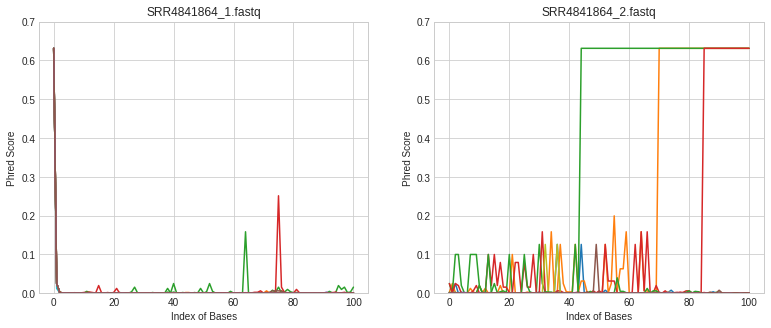

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13,5))

### read 1
ax = axes[0]
with open(os.path.join(DIR_DAT_RAW, "SRR4841864_1.fastq"), 'r') as fp:
    for cnt, line in enumerate(fp):
        if cnt > 64:
            break   
        if cnt % 4 == 3:
            line = line.strip()
            phred = [ord(char)-33      for char  in line ]
            prob  = [error_prob(score) for score in phred]
            ax.plot(prob)
            
### read 2
ax = axes[1]
with open(os.path.join(DIR_DAT_RAW, "SRR4841864_2.fastq"), 'r') as fp:
    for cnt, line in enumerate(fp):
        if cnt > 64:
            break   
        if cnt % 4 == 3:
            line = line.strip()
            phred = [ord(char)-33      for char  in line ]
            prob  = [error_prob(score) for score in phred]
            ax.plot(prob)
            
### Set plot axes
ax1, ax2 = axes
ax1.set_title("SRR4841864_1.fastq")
ax2.set_title("SRR4841864_2.fastq")

ax1.set_ylim([0, 0.7])
ax2.set_ylim([0, 0.7])

ax1.set_xlabel("Index of Bases")
ax2.set_xlabel("Index of Bases")

ax1.set_ylabel("Phred Score")
ax2.set_ylabel("Phred Score")
pass